Dear Participant,

Please find below the Project 2 for Unsupervised Learning course. This is an individual assignment. Kindly submit it before
it's deadline.

The purpose of the case study is to classify a given silhouette as one of four different types of vehicle, using a set of 
features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
Four &quot;Corgie&quot; model vehicles were used for the experiment: a double decker bus, Cheverolet
van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the 
bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between 
the cars.
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the
silhouette. The vehicle may be viewed from one of many different angles.
 
Link to the case file: vehicle.csvView in a new window
    
The points distribution for this case is as follows:
1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)
2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully 
which all attributes have to be a part of the analysis and why (5 points)
3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 10 points
4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out
the best hyper parameters and do cross validation to find the accuracy. (10 points)

 

Please note: Since going forward, you will be pushing all your assessment files to the same repository for the remainder of the
    program, so it is important that you follow some name structure to identify your assessment submission properly.

Please name your file in the following format - CourseName_ResidencyNumber_ProjectNo.ipynb

For Ex - Unsupervised Learning_R5_Project2.ipynb

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import svm

from sklearn.decomposition import PCA
from scipy.stats import zscore

# Read the dataset

vehicle_df = pd.read_csv("vehicle (2).csv")  

# drop the car name column as it is useless for the model

vehicle_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)

In [3]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [4]:
vehicle_df['class'] = vehicle_df['class'].astype('category') 

In [5]:
#Apply Label Encoding to treat object/categorical variable
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
vehicle_df['class']= label_encoder.fit_transform(vehicle_df['class']) 
vehicle_df['class'].unique() 
  

array([2, 1, 0], dtype=int64)

In [6]:
#Treat missing values
vehicle_df = vehicle_df.replace('?', np.nan)
vehicle_df = vehicle_df.apply(lambda x: x.fillna(x.median()),axis=0)

#Using box plot to treat outliers

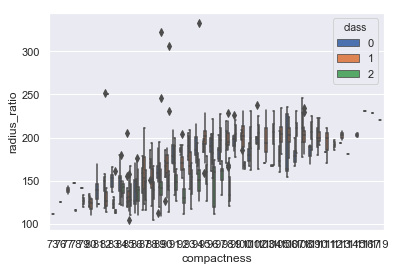

In [7]:
sns.set(color_codes=True)
#sns.boxplot(vehicle_df['compactness'], vehicle_df['circularity'], hue=vehicle_df['class'],width=0.6,saturation=1)
sns.boxplot(x=vehicle_df['compactness'],y=vehicle_df['radius_ratio'],hue=vehicle_df['class'],width=0.6,saturation=1)

Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully
which all attributes have to be a part of the analysis and why (5 points)

In [8]:
vehicle_df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    0.977541    0.702130    0.0    0.00   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0  
class                          1.0    1.00     2.0

scaled_variance.1 is effected by outliers. Thus Mean is getting shifted. So, either we need to treat outliers or drop this column.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


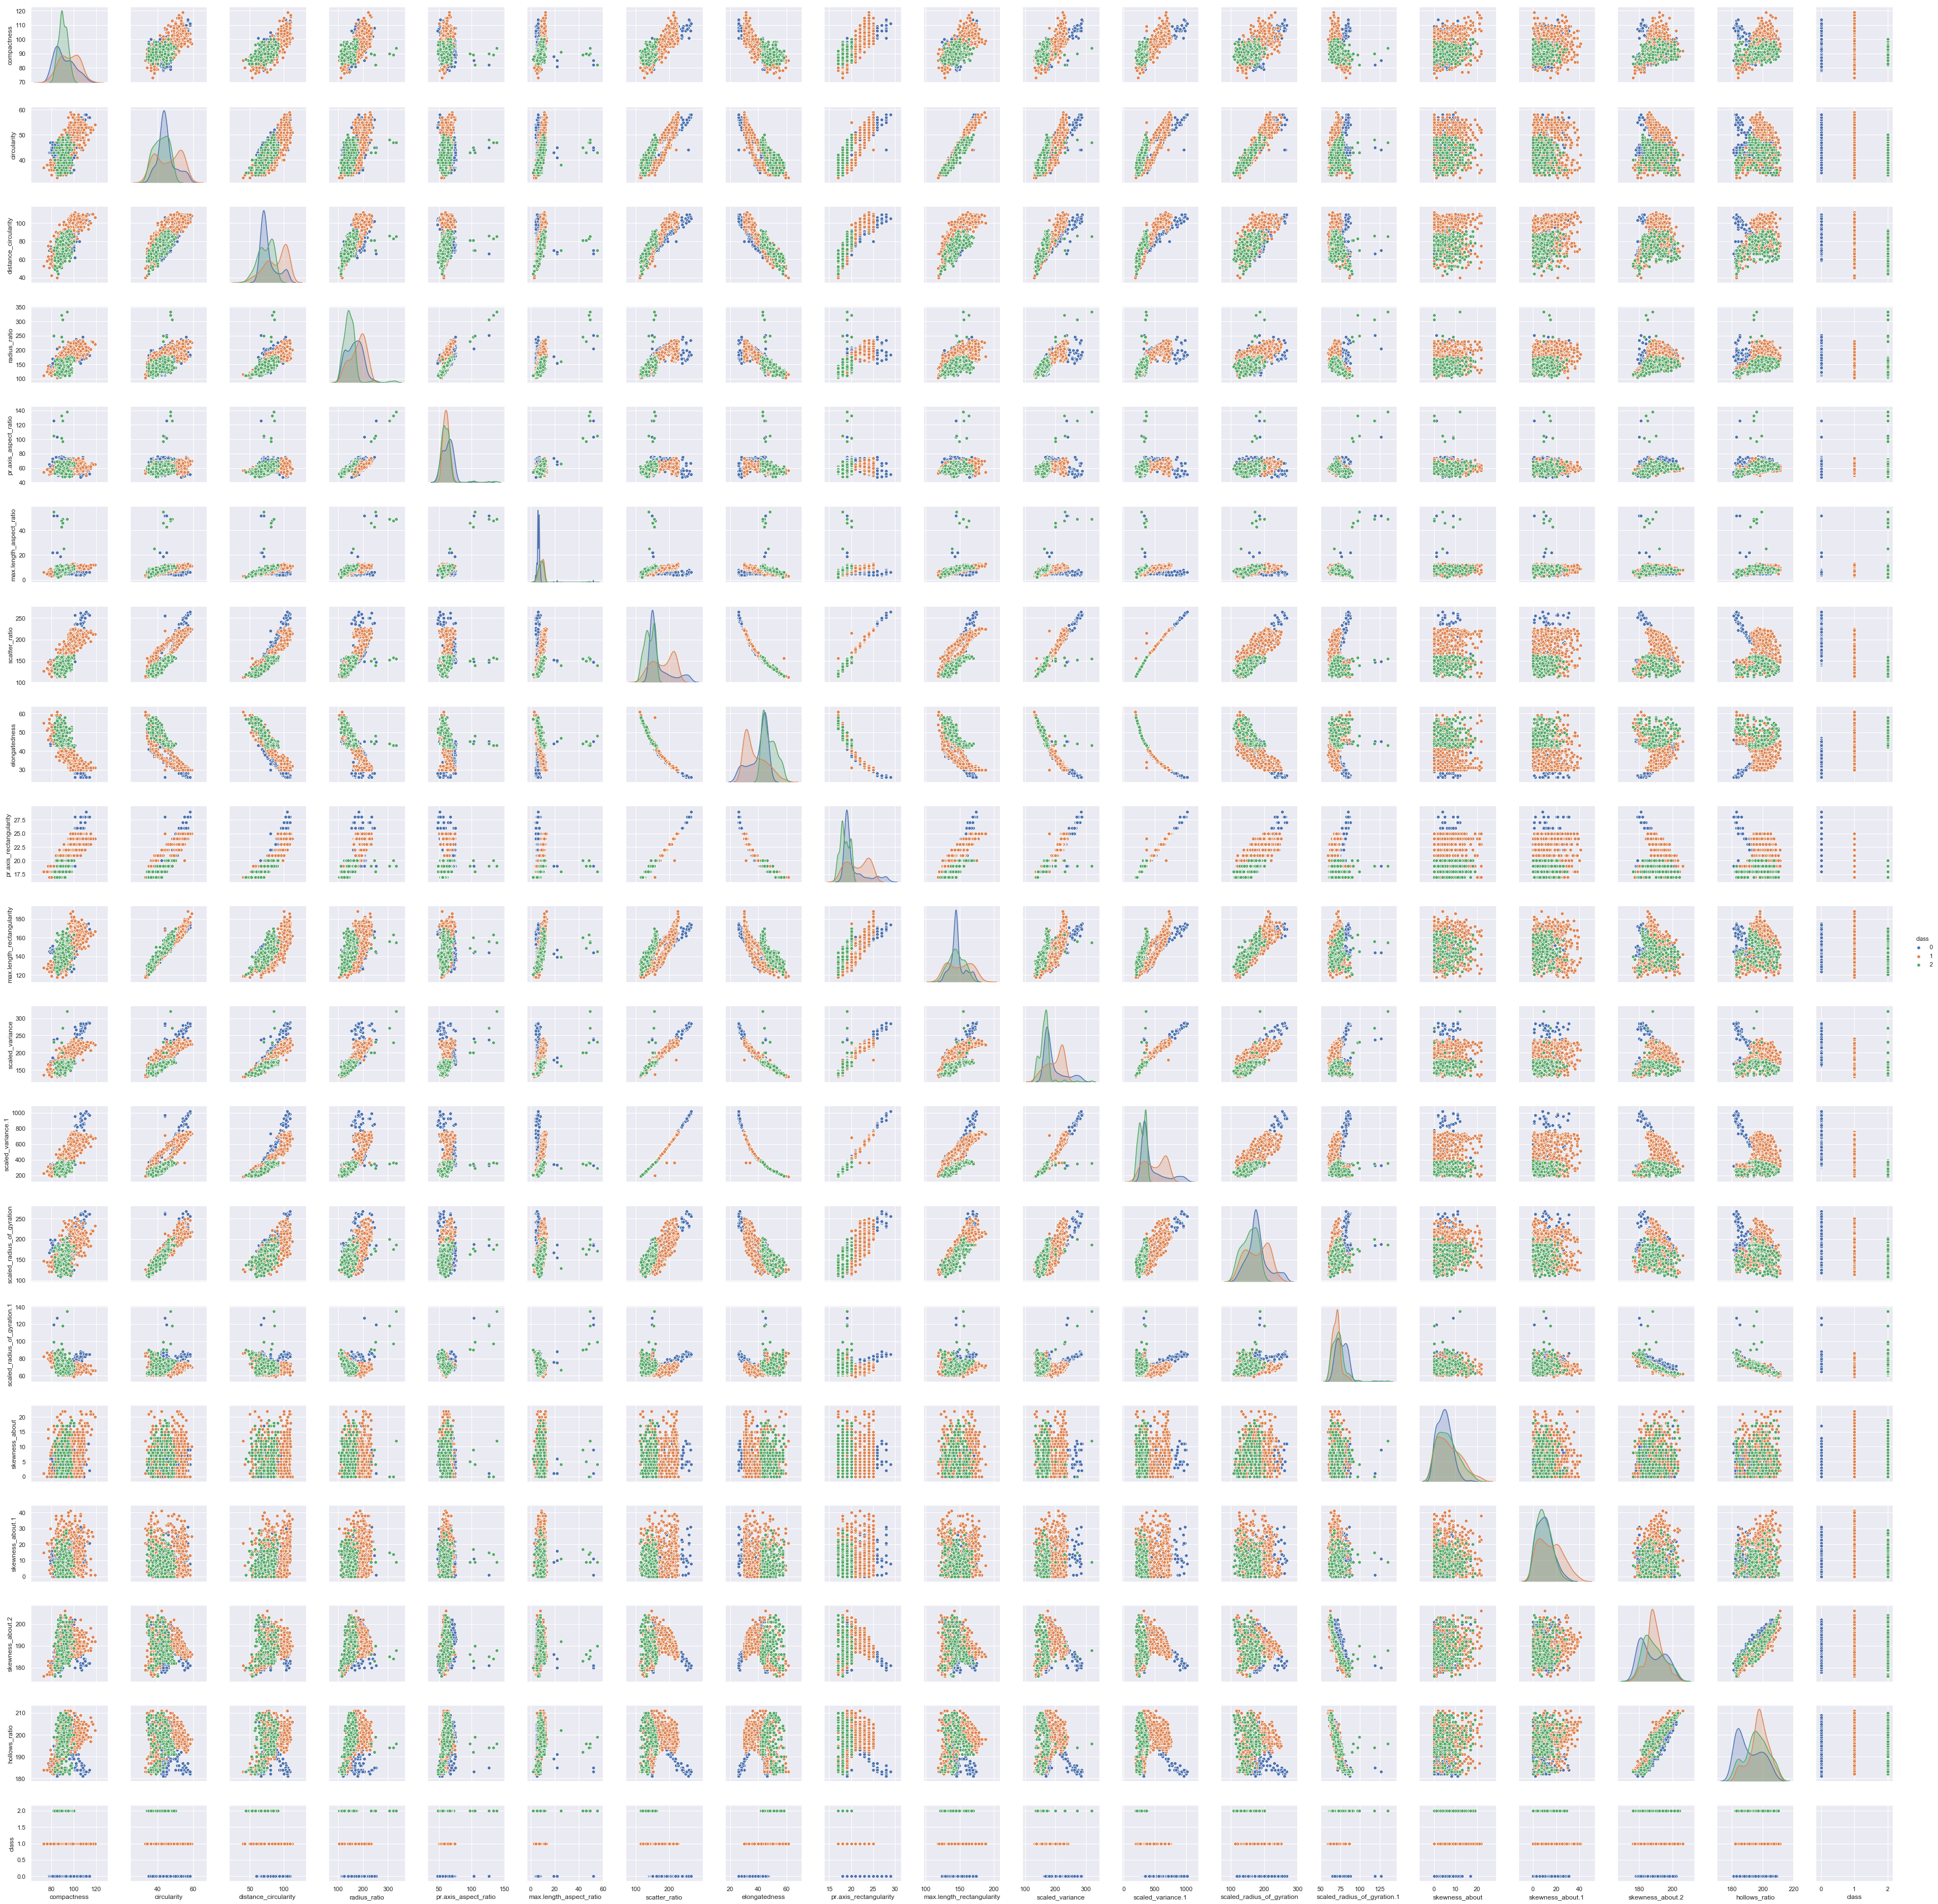

In [9]:
sns.pairplot(vehicle_df, diag_kind='kde',hue='class')  

1. From the pairplot we observe that, all the features are overlapping for all 3 classes.
   Thus we don't have even a single significant features identifying each class.

2. radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio and scaled_radius_of_gyration.1 needs to be treated for outliers.
  
3. Doing PCA on dimensions not having any relationship(negative or postive linear) is useless.skewness_about,skewness_about.1,
   skewness_about.2 and hollows_ratio do not have any linear(positive or negative) relationship. 


Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the
variance) - 10 points

In [10]:
vehicle_df_z = vehicle_df.apply(zscore)
cov_matrix = np.cov(vehicle_df_z.T)

print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446
  -0.03383559]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562
  -0.15909793]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625
  -0.06454368]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659
  -0.18240153]
 [ 0.09164265  0.15396023  0.1

In [11]:
X = vehicle_df[vehicle_df.columns[1:-1]]
y = vehicle_df["class"]

In [12]:
X_z = X.apply(zscore)
cov_matrix = np.cov(X_z.T)

print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00118343  0.79325751  0.6216467   0.15396023  0.25176438  0.8489411
  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508  0.92691166
   0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79325751  1.00118343  0.76794246  0.15864319  0.26499957  0.90614687
  -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577  0.70660663
  -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.6216467   0.76794246  1.00118343  0.66423242  0.45058426  0.73529816
  -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618  0.53700678
  -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.15396023  0.15864319  0.66423242  1.00118343  0.64949139  0.10385472
  -0.18325156  0.07969786  0.1270594   0.27323306  0.08929427  0.12211524
   0.15313091 -0.05843967 -0.0320139   0.24016968  0.26804208]
 [ 0.25176438  0.26499957  0.45058426  0.64949139  1.00118343  0.16638787
  -0.18035326  0.16169312  0.30630475  0.31933428  0.1434227 

In [13]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.30716806 -0.11059145  0.03347052  0.19910028 -0.07062272  0.28056164
   0.30144953 -0.08375275 -0.10989802 -0.00641071  0.00878969 -0.07481405
   0.2604876  -0.61511447  0.40193948 -0.21315772  0.0079465 ]
 [ 0.31526104  0.08957193  0.07532171 -0.05984492  0.05004981  0.12363379
  -0.19301419  0.41981113  0.22768822 -0.68712863 -0.0061816   0.02578491
  -0.08169396 -0.15417179 -0.16889724 -0.01717938 -0.26094331]
 [ 0.27692133  0.21290718 -0.2564833  -0.03906584 -0.04418936 -0.26634382
   0.13166639  0.23921331 -0.03533068  0.12589364  0.04857469  0.04221712
  -0.51443234  0.18218657  0.54127019 -0.16960447 -0.14971167]
 [ 0.08769365  0.14562561 -0.63587934  0.02425269 -0.04431171 -0.25647928
   0.42850854  0.20487586 -0.15038894 -0.0441116  -0.03565405 -0.01649815
   0.29286919 -0.07174107 -0.37755164  0.11319243  0.02122408]
 [ 0.1053014   0.0085409  -0.59489136  0.01512196  0.20673007  0.45539876
  -0.50745454 -0.04591446  0.14495739  0.26351264  0.01009559  0

In [14]:
eig_pairs = [(eig_vals[index], eig_vecs[:,index]) for index in range(len(eig_vals))]


# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()
print(eig_pairs)

# Note: always form pair of eigen vector and values  first before sorting...

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eig_vals))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eig_vals))]


print('Eigen values: \n%s' %eigvalues_sort)
print('Eigen vectors: \n%s' %eigvectors_sort)


[(8.717906178074504, array([ 0.30716806,  0.31526104,  0.27692133,  0.08769365,  0.1053014 ,
        0.32916124, -0.32633382,  0.32565836,  0.2957178 ,  0.32239989,
        0.32541872,  0.28711183, -0.01179208,  0.03788366,  0.05946042,
        0.0209435 ,  0.06804691])), (2.966134311285942, array([-0.11059145,  0.08957193,  0.21290718,  0.14562561,  0.0085409 ,
       -0.03409268, -0.02959288, -0.0470214 , -0.10228965, -0.04502484,
       -0.04076153, -0.19545358, -0.48765549,  0.04836948,  0.12967485,
        0.54518867,  0.54985485])), (1.8762468899110327, array([ 0.03347052,  0.07532171, -0.2564833 , -0.63587934, -0.59489136,
        0.11078503, -0.07528861,  0.12121913,  0.02436481, -0.04566162,
        0.12087822,  0.03669583, -0.31284553,  0.10605637,  0.09202551,
        0.01220674, -0.01318744])), (1.1733077227152693, array([ 0.19910028, -0.05984492, -0.03906584,  0.02425269,  0.01512196,
       -0.08742121,  0.07069244, -0.08516803,  0.1980575 , -0.11701852,
       -0.0841530

In [15]:
tot = sum(eig_vals)
var_explained = [(i / tot) for i in sorted(eig_vals, reverse=True)]

cum_var_exp = np.cumsum(var_explained)

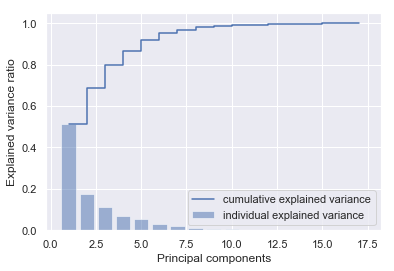

In [16]:
plt.bar(range(1,18),var_explained,alpha=0.5,align='center',label='individual explained variance')
plt.step(range(1,18),cum_var_exp,where='post',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [17]:
P_reduce = np.array(eig_vecs[0:14])
X_std_8D = np.dot(X_z,P_reduce.T)
proj_data_df = pd.DataFrame(X_std_8D)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(proj_data_df, y, test_size=0.30, random_state=1)


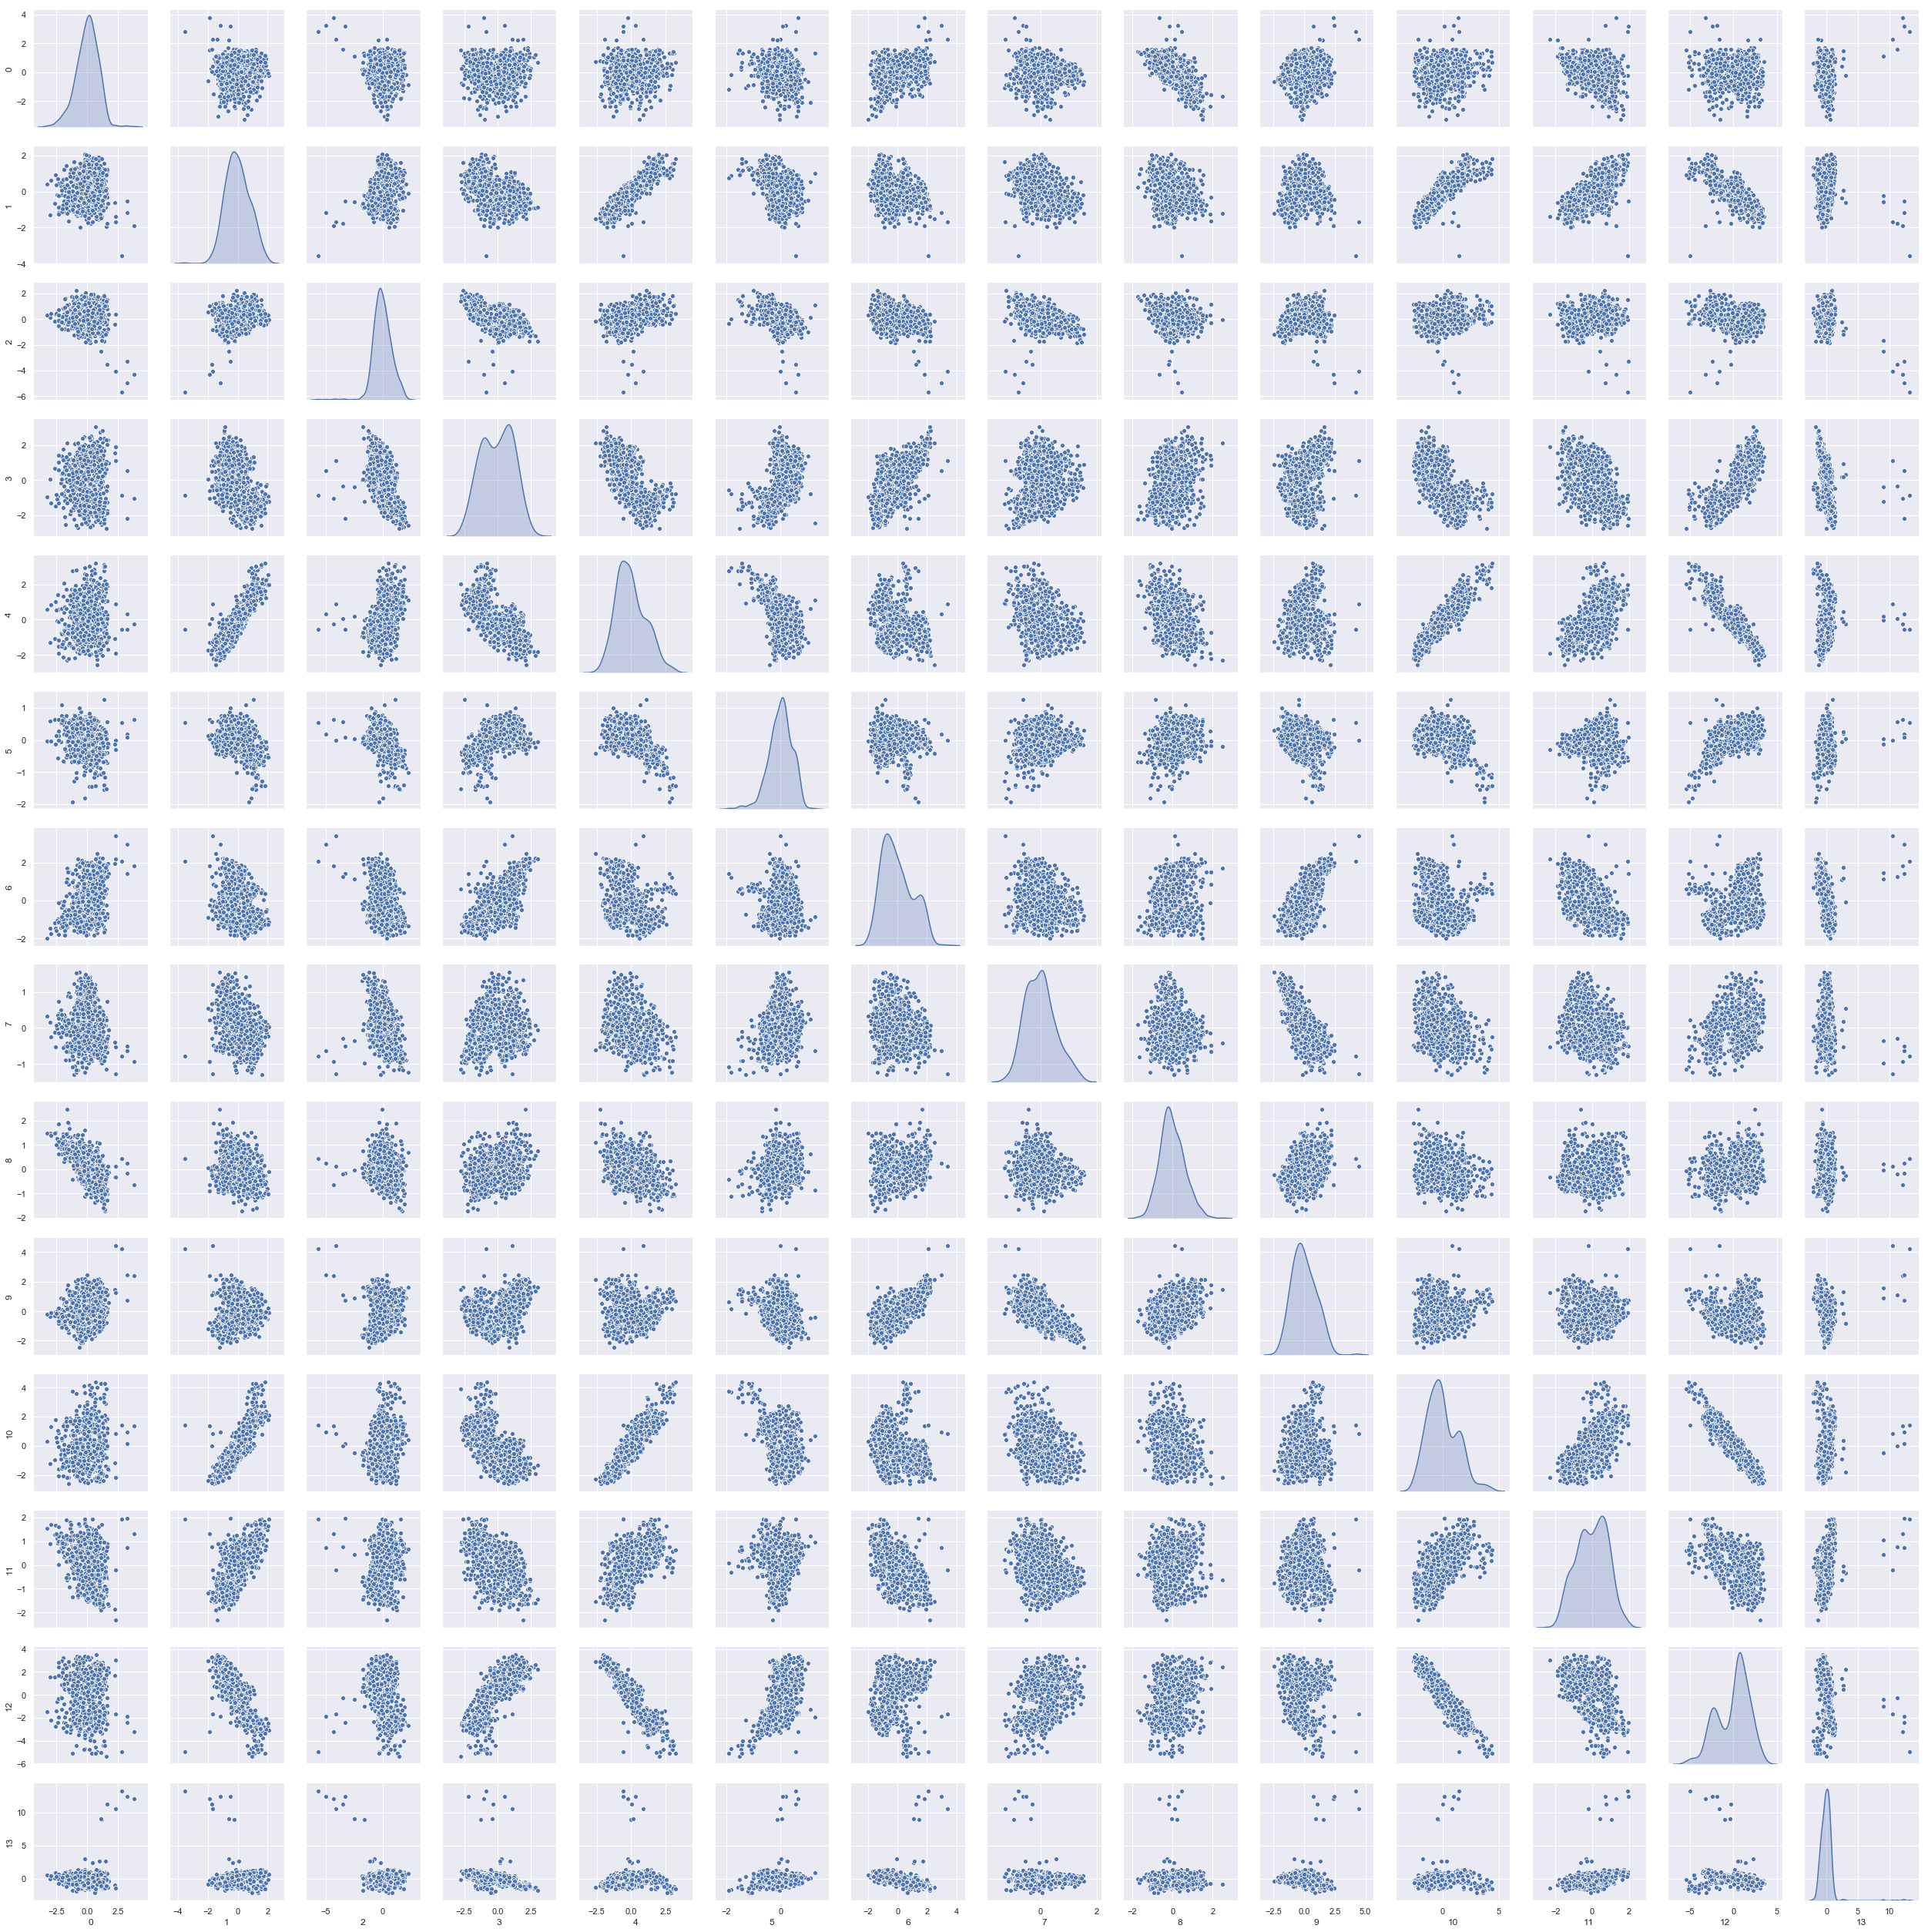

In [19]:
sns.pairplot(proj_data_df, diag_kind='kde')  

In [20]:
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

regression_model.coef_

array([-0.36686479,  0.12750386,  0.48827214,  0.82642668, -0.60144505,
       -0.23727873, -0.13425511, -0.34366557, -0.86492287, -0.12193245,
       -0.53668417,  0.28164581, -0.65392239,  0.22167029])

In [21]:
regression_model.intercept_

0.9688981318341993

In [22]:
regression_model.score(X_test, y_test)

0.5366790918573556

Using PCA Dimension reduction, scores are getting reduced. If we use :
    [0:14] - score is 54%
    [0:16] - score is maximum
    Thus dimension reduction is not helping in increasing the accuracy score of the model.

Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and 
find out the best hyper parameters and do cross validation to find the accuracy. (10 points)

SVM using kernel 'linear' and C values=0.01,0.05,1

In [23]:
from sklearn.svm import SVC  
svclassifier = SVC(C= 0.01,kernel = 'linear')      # try with linear kernel 
svclassifier.fit(X_train, y_train) 

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [24]:
y_pred = svclassifier.predict(X_test) 
y_pred

array([0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 0, 2, 0, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0, 2, 1,
       0, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 0, 1, 2, 1, 2, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 2, 1,
       0, 0, 1, 1, 0, 2, 2, 2, 0, 0, 0, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 0, 2, 2, 2, 1, 2, 1, 2, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 2, 0, 1, 0, 2, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 2, 1, 0, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 0, 0, 0, 1, 1, 0,
       2, 1, 2, 0, 1, 0, 0, 1, 2, 0, 1, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 1,
       1, 0, 2, 1, 2, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1, 1,
       1, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1, 1], dtype=int64)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

[[ 35  21   3]
 [  6 116  11]
 [ 16   2  44]]
              precision    recall  f1-score   support

           0       0.61      0.59      0.60        59
           1       0.83      0.87      0.85       133
           2       0.76      0.71      0.73        62

   micro avg       0.77      0.77      0.77       254
   macro avg       0.74      0.73      0.73       254
weighted avg       0.76      0.77      0.77       254



In [26]:
from sklearn.svm import SVC  
svclassifier = SVC(C= 0.05,kernel = 'linear')      # try with linear kernel 
svclassifier.fit(X_train, y_train) 

SVC(C=0.05, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [27]:
y_pred = svclassifier.predict(X_test) 

In [28]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

[[ 46  10   3]
 [ 11 115   7]
 [  7   0  55]]
              precision    recall  f1-score   support

           0       0.72      0.78      0.75        59
           1       0.92      0.86      0.89       133
           2       0.85      0.89      0.87        62

   micro avg       0.85      0.85      0.85       254
   macro avg       0.83      0.84      0.84       254
weighted avg       0.86      0.85      0.85       254



In [29]:
from sklearn.svm import SVC  
svclassifier = SVC(C= 1,kernel = 'linear')      # try with linear kernel 
svclassifier.fit(X_train, y_train) 

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [30]:
y_pred = svclassifier.predict(X_test) 

In [31]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

[[ 49   7   3]
 [  7 123   3]
 [  4   4  54]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.82        59
           1       0.92      0.92      0.92       133
           2       0.90      0.87      0.89        62

   micro avg       0.89      0.89      0.89       254
   macro avg       0.88      0.88      0.88       254
weighted avg       0.89      0.89      0.89       254



Kernel linear with c=1 gives better result compared to c=0.01 and 0.05

SVM using kernel 'rbf' and C values=0.01,0.05,1

In [32]:
svclassifier = SVC(C = 0.05,kernel='rbf')  
svclassifier.fit(X_train, y_train) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=0.05, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [33]:
y_pred = svclassifier.predict(X_test)  

In [34]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))
  

[[ 25  33   1]
 [  1 131   1]
 [ 13  42   7]]
              precision    recall  f1-score   support

           0       0.64      0.42      0.51        59
           1       0.64      0.98      0.77       133
           2       0.78      0.11      0.20        62

   micro avg       0.64      0.64      0.64       254
   macro avg       0.68      0.51      0.49       254
weighted avg       0.67      0.64      0.57       254



In [35]:
svclassifier = SVC(C = 0.01,kernel='rbf')  
svclassifier.fit(X_train, y_train) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [36]:
y_pred = svclassifier.predict(X_test)  

In [37]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))
  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[  0  59   0]
 [  0 133   0]
 [  0  62   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.52      1.00      0.69       133
           2       0.00      0.00      0.00        62

   micro avg       0.52      0.52      0.52       254
   macro avg       0.17      0.33      0.23       254
weighted avg       0.27      0.52      0.36       254



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [38]:
svclassifier = SVC(C = 1,kernel='rbf')  
svclassifier.fit(X_train, y_train) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [39]:
y_pred = svclassifier.predict(X_test)  

In [40]:
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))

[[ 53   4   2]
 [  3 125   5]
 [  1   3  58]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.91        59
           1       0.95      0.94      0.94       133
           2       0.89      0.94      0.91        62

   micro avg       0.93      0.93      0.93       254
   macro avg       0.92      0.92      0.92       254
weighted avg       0.93      0.93      0.93       254



Kernel rbf with c=1 gives better result compared to c=0.01 and 0.05